In [137]:
import librosa  
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import noisereduce as nr
from jupyterthemes import jtplot


In [138]:
jtplot.style(theme='monokai', context='notebook', ticks=True, gridlines='--')

In [139]:
mp3Folder = os.path.join("bird_data","wav_files")
mp3Files = os.listdir(mp3Folder)
test = os.path.join(mp3Folder, mp3Files[0])

# Audio Spectral Features


## Load Audio Signal Function

In [140]:
# Load signal
def loadSignal(file, downsample=True):
    SR = (22050 if downsample else 44100)
    signal, sr = librosa.load(file, sr=SR, mono=True)
    return signal, sr

## Spectrogram Functions

In [141]:
# Plot Raw signal
def RawSignal(FILE):
    signal, sr = loadSignal(FILE)
    plt.figure(figsize=(10, 4))
    librosa.display.waveplot(signal, sr=sr)
    plt.title(f'Monophonic signal for {FILE[20:-13]}')
    plt.show()

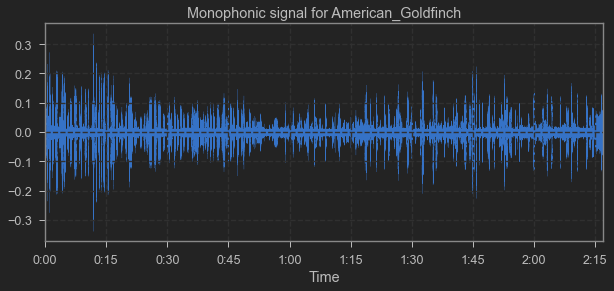

In [142]:
RawSignal(test)

In [144]:
# Linear-frequency power spectrogram
def Feq_Spectrogram(FILE):
    signal, sr = loadSignal(FILE)  
    plt.figure(figsize=(10, 4))
    spectra= librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(spectra, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Linear-frequency power spectrogram for {FILE[20:-13]}')
    plt.show()

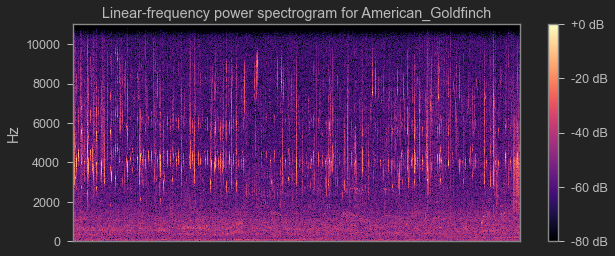

In [145]:
Feq_Spectrogram(test)

In [149]:
# Short-time Fourier transform (STFT)
def STFT(FILE, N_FFT, HOP_LENGTH, WIN_LENGTH, WINDOW):
    # window = "hamming"
    signal, sr = loadSignal(FILE)    
    stft = librosa.stft(y=signal, n_fft=N_FFT, hop_length=HOP_LENGTH, center=True, win_length=WIN_LENGTH, window = WINDOW) 
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(stft**2,ref=np.max), fmin=0, x_axis='time', y_axis='log', ax=ax, )
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set_title(f'Power Spectrogram for {FILE[20:-13]}')
    plt.show()

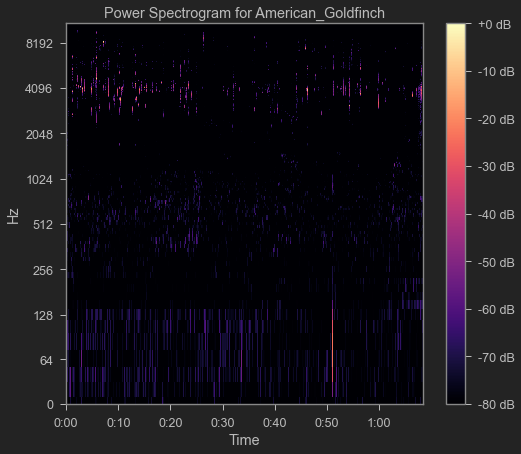

In [150]:
STFT(test, 1024, 1024, 1024, 'hamming')

In [153]:
# Plot mel-spectrogram
def Mel_Spectrogram(FILE, N_FFT, N_MElS, HOP_LENGTH,FILTER=False):
    FMIN = (1400 if FILTER else 0)
    signal, sr = loadSignal(FILE)  
    mel = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=N_FFT, n_mels=N_MELS, hop_length=HOP_LENGTH, htk=True, fmin=FMIN, fmax=sr/2) 
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel**2,ref=np.max), fmin=FMIN, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    title = ('Mel-scaled spectrogram with high-pass filter' if FILTER else 'Mel-scaled spectrogram')
    plt.title(title+" for "+FILE[20:-13])
    plt.show()

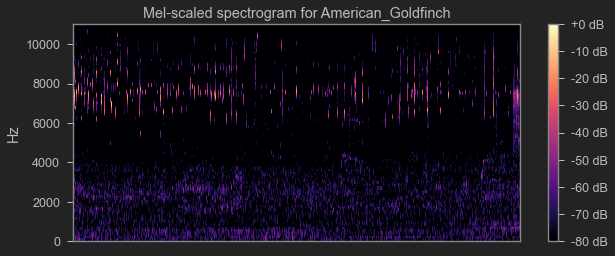

In [154]:
Mel_Spectrogram(test,1024,128,1024)

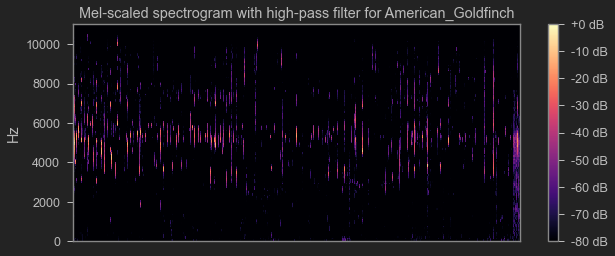

In [155]:
Mel_Spectrogram(test,1024,128,1024,True)

In [156]:
# Mel-frequency cepstral coefficients (MFCCs)
def MFCC(FILE, N_FFT, N_MFCC, HOP_LENGTH, FILTER=False):
    LIFTER=(2*N_MFCC if FILTER else 0) # cesptral filtering
    signal, sr = loadSignal(FILE)  
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_fft = N_FFT, n_mfcc=N_MFCC, hop_length=HOP_LENGTH, htk=True, lifter=LIFTER, dct_type=2)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    title = ('MFCC with cepstral filtering' if FILTER else 'MFCC')
    ax.set(title=title+" for "+FILE[20:-13])
    plt.show()

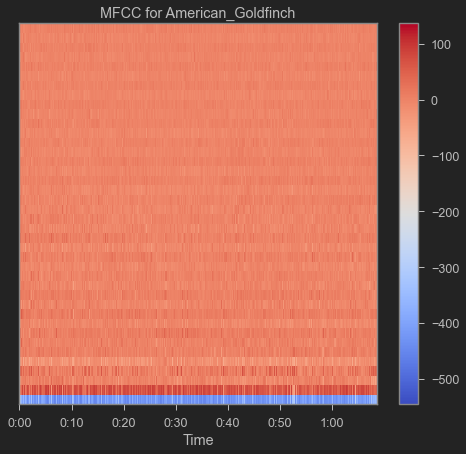

In [157]:
MFCC(test, 1024, 40, 1024)

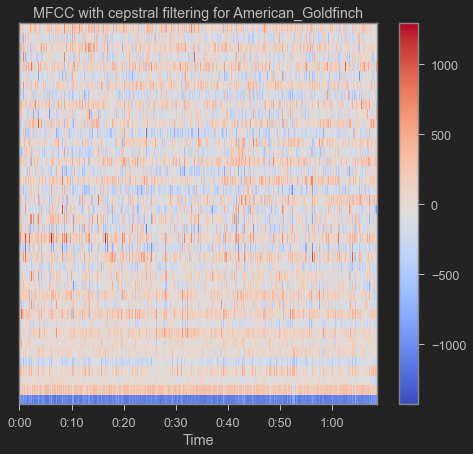

In [158]:
MFCC(test, 1024, 40, 1024,True)

In [160]:
# Clean signal by a noise threshold 
def denoise(y, sr,threshold):
    y = pd.Series(y).apply(np.abs)
    th = []
    y_mean = y.rolling(window=int(sr/10),min_periods=1,center=True).mean()
    for m in y_mean:
        if m>threshold:
            th.append(True)
        else:
            th.append(False)
    return th